# Handle Outliers:

<b>Removal:You can choose to remove the data points that are identified as outliers.

<b>Transformation: You can apply transformations to the data to reduce the impact of outliers (e.g.,log transformation).

<b>Capping: You can cap the extreme values at a certain threshold.

<b>Imputation: You can replace outliers with more representative values (e.g.,mean,median) if appropriate. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('LoanApproval-EDA.csv')
data.head()

,Unnamed: 0,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0,1,2.0,Graduate,No,9600000.0,29900000.0,NaN,778.0,2400000.0,17600000.0,22700000.0,8000000.0,Approved
1,1,2,0.0,Not Graduate,Yes,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,NaN,Rejected
2,2,3,3.0,Graduate,No,9100000.0,29700000.0,20.0,506.0,7100000.0,NaN,33300000.0,12800000.0,Rejected
3,3,4,3.0,Graduate,No,8200000.0,30700000.0,8.0,467.0,NaN,3300000.0,23300000.0,7900000.0,Rejected
4,4,5,5.0,Not Graduate,Yes,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0,Rejected


In [3]:
df = data.copy()


In [4]:
categorical = []
numerical = []
for col in df.columns:
    if df[col].dtypes=='O':
        categorical.append(col)
    else:
        numerical.append(col)

In [5]:
colsToStudy = ['residential_assets_value','commercial_assets_value']
data = df[colsToStudy]


In [6]:
data

,residential_assets_value,commercial_assets_value
0,2400000.0,17600000.0
1,2700000.0,2200000.0
2,7100000.0,NaN
3,NaN,3300000.0
4,12400000.0,8200000.0
...,...,...
4264,2800000.0,500000.0
4265,4200000.0,NaN
4266,1200000.0,12400000.0
4267,8200000.0,700000.0


<Axes: >

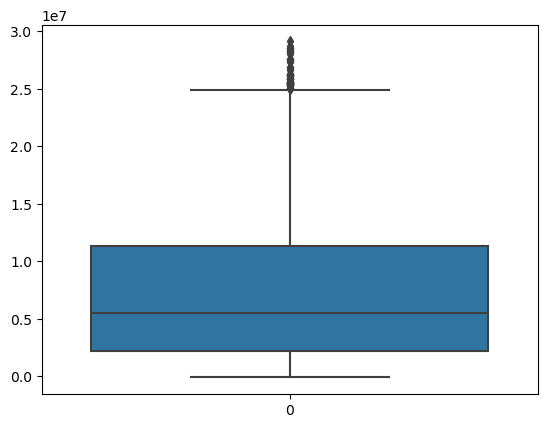

In [7]:
sns.boxplot(data['residential_assets_value'])

# Boundary Values

# mean+-3*std_dev 

In [8]:
data['boundval_rav'] = data['residential_assets_value'] 

C:\Users\Anoop Raj\AppData\Local\Temp\ipykernel_19472\2521060659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['boundval_rav'] = data['residential_assets_value']


In [9]:
data.isnull().sum()

residential_assets_value    261
commercial_assets_value     179
boundval_rav                261
dtype: int64

In [10]:
data['boundval_rav'].fillna(data['boundval_rav'].mean(),inplace=True)

C:\Users\Anoop Raj\AppData\Local\Temp\ipykernel_19472\2154520453.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['boundval_rav'].fillna(data['boundval_rav'].mean(),inplace=True)
C:\Users\Anoop Raj\AppData\Local\Temp\ipykernel_19472\2154520453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['boundval_rav'].fillna(data['boundva

In [11]:
data.isnull().sum()

residential_assets_value    261
commercial_assets_value     179
boundval_rav                  0
dtype: int64

C:\Users\Anoop Raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='boundval_rav', ylabel='Density'>

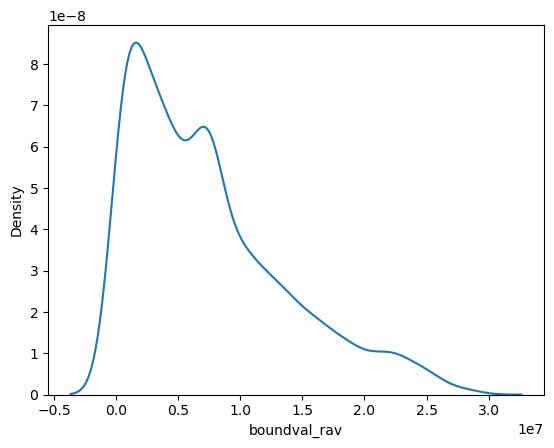

In [12]:
sns.kdeplot(data['boundval_rav'])

<Axes: >

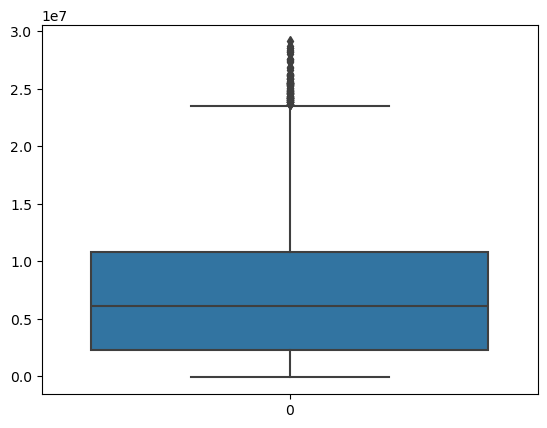

In [13]:
sns.boxplot(data['boundval_rav'])

In [14]:
mean = data['boundval_rav'].mean()
std = data['boundval_rav'].std()

In [15]:
upper_boundary = mean+(3*std)
lower_boundary = mean-(3*std)

## Trimming

In [16]:
data[(data['boundval_rav']>upper_boundary) | (data['boundval_rav']<lower_boundary)].shape

(17, 3)

In [17]:
boundval_rav = data[(data['boundval_rav']<=upper_boundary) & (data['boundval_rav']>=lower_boundary)]

C:\Users\Anoop Raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Anoop Raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


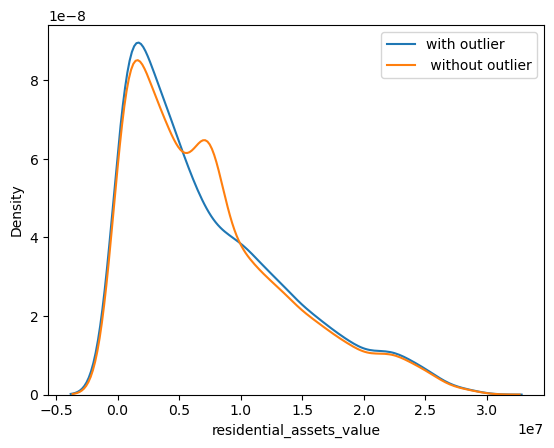

In [18]:
sns.kdeplot(data['residential_assets_value'],label = 'with outlier')
sns.kdeplot(data['boundval_rav'],label=' without outlier')
plt.legend()


In [19]:
df.shape

(4269, 14)

In [20]:
boundval_rav.shape

(4252, 3)

In [21]:
data['boundval_rav']

0       2.400000e+06
1       2.700000e+06
2       7.100000e+06
3       7.453194e+06
4       1.240000e+07
            ...     
4264    2.800000e+06
4265    4.200000e+06
4266    1.200000e+06
4267    8.200000e+06
4268    1.780000e+07
Name: boundval_rav, Length: 4269, dtype: float64

# Capping

In [22]:
data['cappednp_rav'] = np.where(data['boundval_rav']>upper_boundary,upper_boundary,
         np.where(data['boundval_rav']<lower_boundary,lower_boundary,data['boundval_rav']))

C:\Users\Anoop Raj\AppData\Local\Temp\ipykernel_19472\2512520247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cappednp_rav'] = np.where(data['boundval_rav']>upper_boundary,upper_boundary,


In [23]:
data.head()

,residential_assets_value,commercial_assets_value,boundval_rav,cappednp_rav
0,2400000.0,17600000.0,2.400000e+06,2.400000e+06
1,2700000.0,2200000.0,2.700000e+06,2.700000e+06
2,7100000.0,NaN,7.100000e+06,7.100000e+06
3,NaN,3300000.0,7.453194e+06,7.453194e+06
4,12400000.0,8200000.0,1.240000e+07,1.240000e+07


C:\Users\Anoop Raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Anoop Raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


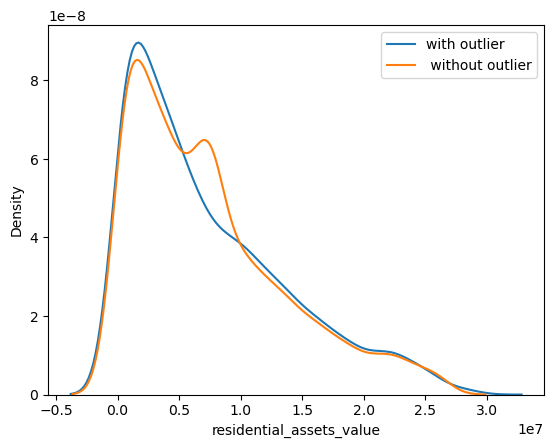

In [24]:
sns.kdeplot(data['residential_assets_value'],label = 'with outlier')
sns.kdeplot(data['cappednp_rav'],label=' without outlier')
plt.legend()

# Z-score

In [25]:
data.head()

,residential_assets_value,commercial_assets_value,boundval_rav,cappednp_rav
0,2400000.0,17600000.0,2.400000e+06,2.400000e+06
1,2700000.0,2200000.0,2.700000e+06,2.700000e+06
2,7100000.0,NaN,7.100000e+06,7.100000e+06
3,NaN,3300000.0,7.453194e+06,7.453194e+06
4,12400000.0,8200000.0,1.240000e+07,1.240000e+07


In [26]:
mean = data['residential_assets_value'].mean()
std = data['residential_assets_value'].std()

In [27]:
data['rav_zScore'] = (data['residential_assets_value']-mean)/std

C:\Users\Anoop Raj\AppData\Local\Temp\ipykernel_19472\951880619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rav_zScore'] = (data['residential_assets_value']-mean)/std


In [28]:
#data['rav_zScore']

In [29]:
data.head()

,residential_assets_value,commercial_assets_value,boundval_rav,cappednp_rav,rav_zScore
0,2400000.0,17600000.0,2.400000e+06,2.400000e+06,-0.777833
1,2700000.0,2200000.0,2.700000e+06,2.700000e+06,-0.731654
2,7100000.0,NaN,7.100000e+06,7.100000e+06,-0.054367
3,NaN,3300000.0,7.453194e+06,7.453194e+06,NaN
4,12400000.0,8200000.0,1.240000e+07,1.240000e+07,0.761457


In [30]:
data['rav_zScore'].max()

3.3320719157863232

In [31]:
upper_val = 2.7
lower_val = -2.7

In [32]:
outliers = data[(data['rav_zScore']>upper_val) | (data['rav_zScore']<lower_val)]

In [33]:
outliers.shape

(50, 5)

In [34]:
trimmed_df = data[(data['rav_zScore']<=upper_val) & (data['rav_zScore']>=lower_val)]

In [35]:
trimmed_df.shape

(3958, 5)

In [36]:
data.shape

(4269, 5)

C:\Users\Anoop Raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Anoop Raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


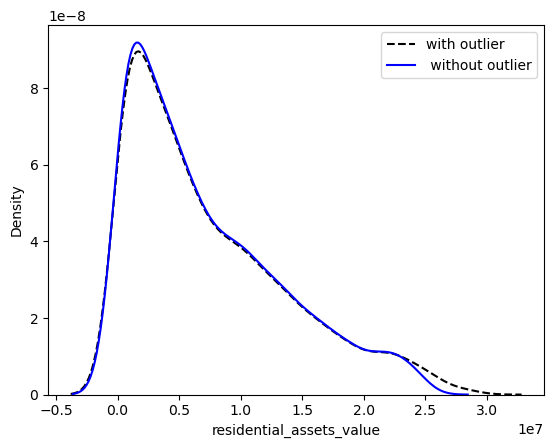

In [37]:
sns.kdeplot(data['residential_assets_value'],label = 'with outlier',ls='dashed',color='black')
sns.kdeplot(trimmed_df['residential_assets_value'],label=' without outlier',color='blue')
plt.legend()


<Axes: >

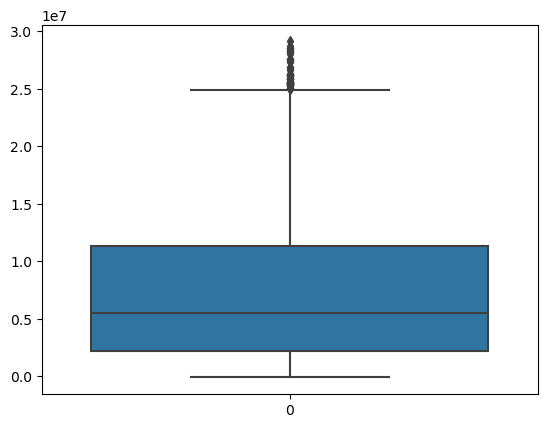

In [38]:
sns.boxplot(data['residential_assets_value'])

<Axes: >

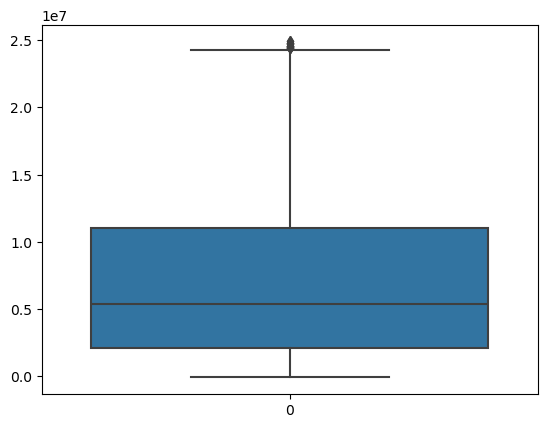

In [39]:
sns.boxplot(trimmed_df['residential_assets_value'])

In [40]:
max_valid_Zscore = data[data['rav_zScore']<=upper_val]['rav_zScore'].max()
min_valid_Zscore = data[data['rav_zScore']<=upper_val]['rav_zScore'].min()

In [41]:
print(max_valid_Zscore)
print(min_valid_Zscore)

2.6855699886216184
-1.162655768311148


In [42]:
max_valid_value = data[data['rav_zScore']==max_valid_Zscore]['residential_assets_value'] .values[0]
min_valid_value = data[data['rav_zScore']==min_valid_Zscore]['residential_assets_value'] .values[0]

In [43]:
# capping

data['zScore_capped'] = np.where(data['residential_assets_value']>max_valid_value,max_valid_value,
                                        np.where(data['residential_assets_value']<min_valid_value,
                                                 min_valid_value,
                                                 data['residential_assets_value']))

C:\Users\Anoop Raj\AppData\Local\Temp\ipykernel_19472\2107184178.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['zScore_capped'] = np.where(data['residential_assets_value']>max_valid_value,max_valid_value,


In [44]:
data.head()

,residential_assets_value,commercial_assets_value,boundval_rav,cappednp_rav,rav_zScore,zScore_capped
0,2400000.0,17600000.0,2.400000e+06,2.400000e+06,-0.777833,2400000.0
1,2700000.0,2200000.0,2.700000e+06,2.700000e+06,-0.731654,2700000.0
2,7100000.0,NaN,7.100000e+06,7.100000e+06,-0.054367,7100000.0
3,NaN,3300000.0,7.453194e+06,7.453194e+06,NaN,NaN
4,12400000.0,8200000.0,1.240000e+07,1.240000e+07,0.761457,12400000.0


C:\Users\Anoop Raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Anoop Raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='residential_assets_value', ylabel='Density'>

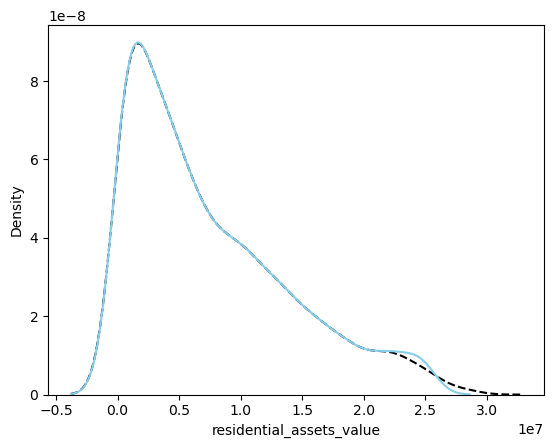

In [45]:
sns.kdeplot(data['residential_assets_value'],ls='dashed',color='black')
sns.kdeplot(data['zScore_capped'],color='skyblue')